<a href="https://colab.research.google.com/github/YeshwanthSadum/Machine-Learning/blob/main/House_Price_Prediction_Iterative_Imputer%2C_Mahalanobis%2C_Cat2Vec_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Importing and Data Preprocessing**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/houseprices-apartments1.csv')

In [ ]:
df


,locality,title,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,"1 BHK Apartment For Sale In Sandy Villa, Btm...",565 sqft,"20,060/Month","₹6,195 per sq.ft.",North-West,1 BHK,1,Bike
1,BTM Layout,3 BHK Apartment For Sale In Sobha Magnolia I...,"1,837 sqft","97,434/Month","₹9,254 per sq.ft.",East,3 BHK,3,Bike and Car
2,BTM Layout,2 BHK Flat For Sale In Nandi Jewels In Btm 2...,"1,280 sqft","54,448/Month","₹7,422 per sq.ft.",East,2 BHK,2,Car
3,BTM Layout,3 BHK Apartment For Sale In Brigade Lakeview...,"2,220 sqft",1.17 Lacs/Month,"₹9,234 per sq.ft.",North,3 BHK,3,Bike and Car
4,BTM Layout,2 BHK Apartment For Sale In Niranjan Central...,"1,113 sqft","34,388/Month","₹5,391 per sq.ft.",East,2 BHK,2,Bike and Car
...,...,...,...,...,...,...,...,...,...
220,Jayanagar,2 BHK Flat For Sale In Krishna Lake View Apt...,"1,060 sqft","45,851/Month","₹7,547 per sq.ft.",Don't Know,2 BHK,2,Bike and Car
221,Jayanagar,3 BHK Apartment For Sale In Gokul Lake View ...,"2,000 sqft","85,971/Month","₹7,500 per sq.ft.",East,3 BHK,3,Bike and Car
222,Jayanagar,3 BHK Flat For Sale In Pallavi Pristine Than...,"1,340 sqft","77,947/Month","₹10,149 per sq.ft.",East,3 BHK,2,Bike and Car
223,Jayanagar,"4+ BHK Flat For Sale In Linea Apoorva, 4th B...","5,100 sqft",4.3 Lacs/Month,"₹14,706 per sq.ft.",East,4+ BHK,5,Bike and Car


In [ ]:
df.drop(['title'], axis = 1, inplace = True)
df['area'] = [ (data.split(' ')[0]).replace(',','') for data in df['area'] ]
#df['rent'].iloc[0].split('/')
df['rent'] = [ (data.split(' ')[0]) for data in df['rent'] ]
df['rent'] = [ (data.split('/')[0]).replace(',','') for data in df['rent'] ]
df['rent'] = df['rent'].astype(float)
#df['rent'] = [ (data.split('/')[0]).replace(',','') for data in df['rent'] ]

In [ ]:
df.head()

,locality,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,565,20060.00,"₹6,195 per sq.ft.",North-West,1 BHK,1,Bike
1,BTM Layout,1837,97434.00,"₹9,254 per sq.ft.",East,3 BHK,3,Bike and Car
2,BTM Layout,1280,54448.00,"₹7,422 per sq.ft.",East,2 BHK,2,Car
3,BTM Layout,2220,1.17,"₹9,234 per sq.ft.",North,3 BHK,3,Bike and Car
4,BTM Layout,1113,34388.00,"₹5,391 per sq.ft.",East,2 BHK,2,Bike and Car


In [ ]:
df['rent'] = df['rent'].apply(lambda x: x*100000 if x<10 else x)
df['price_per_sqft'] = [ float((data.split(' ')[0]).replace(',','').replace('₹', '')) for data in df['price_per_sqft'] ]
df['BHK'] = [ float((data.split(' ')[0]).replace('+','')) for data in df['BHK'] ]


In [ ]:
df.head()

,locality,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,565,20060.0,6195.0,North-West,1.0,1,Bike
1,BTM Layout,1837,97434.0,9254.0,East,3.0,3,Bike and Car
2,BTM Layout,1280,54448.0,7422.0,East,2.0,2,Car
3,BTM Layout,2220,117000.0,9234.0,North,3.0,3,Bike and Car
4,BTM Layout,1113,34388.0,5391.0,East,2.0,2,Bike and Car


In [ ]:
df.area = df.area.astype('float')

In [ ]:
categ_coloumn = [column for column in df.columns if (df[column].dtype == "object")]
categ_coloumn

['locality', 'facing', 'parking']

In [ ]:
ordinal_columns = ['BHK','bathrooms']
numerical_columns  = (df.drop(categ_coloumn, axis = 1)).drop(ordinal_columns, axis = 1).columns

In [ ]:
numerical_columns

Index(['area', 'rent', 'price_per_sqft'], dtype='object')

In [ ]:
df['facing'] = df['facing'].apply(lambda x: x if x!="Don't Know" else np.nan)

In [ ]:
df.isna().sum()

locality           0
area               0
rent               0
price_per_sqft     0
facing            19
BHK                0
bathrooms          0
parking            0
dtype: int64

In [ ]:
df.parking.unique()

array(['Bike', 'Bike and Car', 'Car', 'None'], dtype=object)

In [ ]:
sum(df['parking']=='None')

8

In [ ]:
df['parking'] = df['parking'].apply(lambda x: x if x!="None" else np.nan)

In [ ]:
df.isna().sum()

locality           0
area               0
rent               0
price_per_sqft     0
facing            19
BHK                0
bathrooms          0
parking            8
dtype: int64

In [ ]:
X = df.drop('price_per_sqft', axis = 1)
y = df['price_per_sqft']

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.isna().sum()

locality      0
area          0
rent          0
facing       14
BHK           0
bathrooms     0
parking       5
dtype: int64

In [ ]:
X_test.isna().sum()

locality     0
area         0
rent         0
facing       5
BHK          0
bathrooms    0
parking      3
dtype: int64

In [ ]:
X_train.facing.unique()

array(['North-West', 'East', 'West', 'South', nan, 'North', 'North-East',
       'South-East'], dtype=object)

Ordinal Encoding for categorical features

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train[categ_coloumn] = enc.fit_transform(X_train[categ_coloumn])
X_test[categ_coloumn] = enc.transform(X_test[categ_coloumn])

In [ ]:
X_test

,locality,area,rent,facing,BHK,bathrooms,parking
9,1.0,1600.0,92849.0,4.0,3.0,2,1.0
184,6.0,1150.0,85971.0,6.0,3.0,2,1.0
120,3.0,1331.0,48717.0,0.0,3.0,2,1.0
207,4.0,2336.0,77374.0,0.0,4.0,4,NaN
148,2.0,1108.0,39546.0,0.0,2.0,2,1.0
214,4.0,1940.0,152000.0,6.0,3.0,3,1.0
182,6.0,1550.0,112000.0,0.0,3.0,3,1.0
86,7.0,1302.0,48717.0,0.0,2.0,2,1.0
178,6.0,882.0,42985.0,1.0,2.0,2,1.0
175,6.0,5200.0,344000.0,NaN,4.0,14,NaN


Ordinal Encoding for ordinal features

In [ ]:
df.head()

,locality,area,rent,price_per_sqft,facing,BHK,bathrooms,parking
0,BTM Layout,565.0,20060.0,6195.0,North-West,1.0,1,Bike
1,BTM Layout,1837.0,97434.0,9254.0,East,3.0,3,Bike and Car
2,BTM Layout,1280.0,54448.0,7422.0,East,2.0,2,Car
3,BTM Layout,2220.0,117000.0,9234.0,North,3.0,3,Bike and Car
4,BTM Layout,1113.0,34388.0,5391.0,East,2.0,2,Bike and Car


In [ ]:
df['BHK'].unique()

array([1., 3., 2., 4.])

#**Iterative Imputer** 

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train)
X_train[X_train.columns]  = imp.transform(X_train)
X_test[X_test.columns] = imp.transform(X_test)

In [ ]:
X_test.isna().sum()

locality     0
area         0
rent         0
facing       0
BHK          0
bathrooms    0
parking      0
dtype: int64

In [ ]:
X_train.isna().sum()

locality     0
area         0
rent         0
facing       0
BHK          0
bathrooms    0
parking      0
dtype: int64

In [ ]:
X_train.facing = X_train.facing.astype('uint32')
X_train.parking = X_train.parking.astype('uint32')
X_test.facing = X_test.facing.astype('uint32')
X_test.parking = X_test.parking.astype('uint32')

#**Outlier detection using Mahalanobis distance**

In [ ]:
X_train.BHK.unique()

array([2., 3., 1., 4.])

(array([132.,  31.,  14.,   1.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

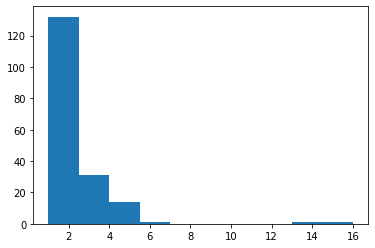

In [ ]:
import matplotlib.pyplot as plt
plt.hist(X_train['bathrooms'])

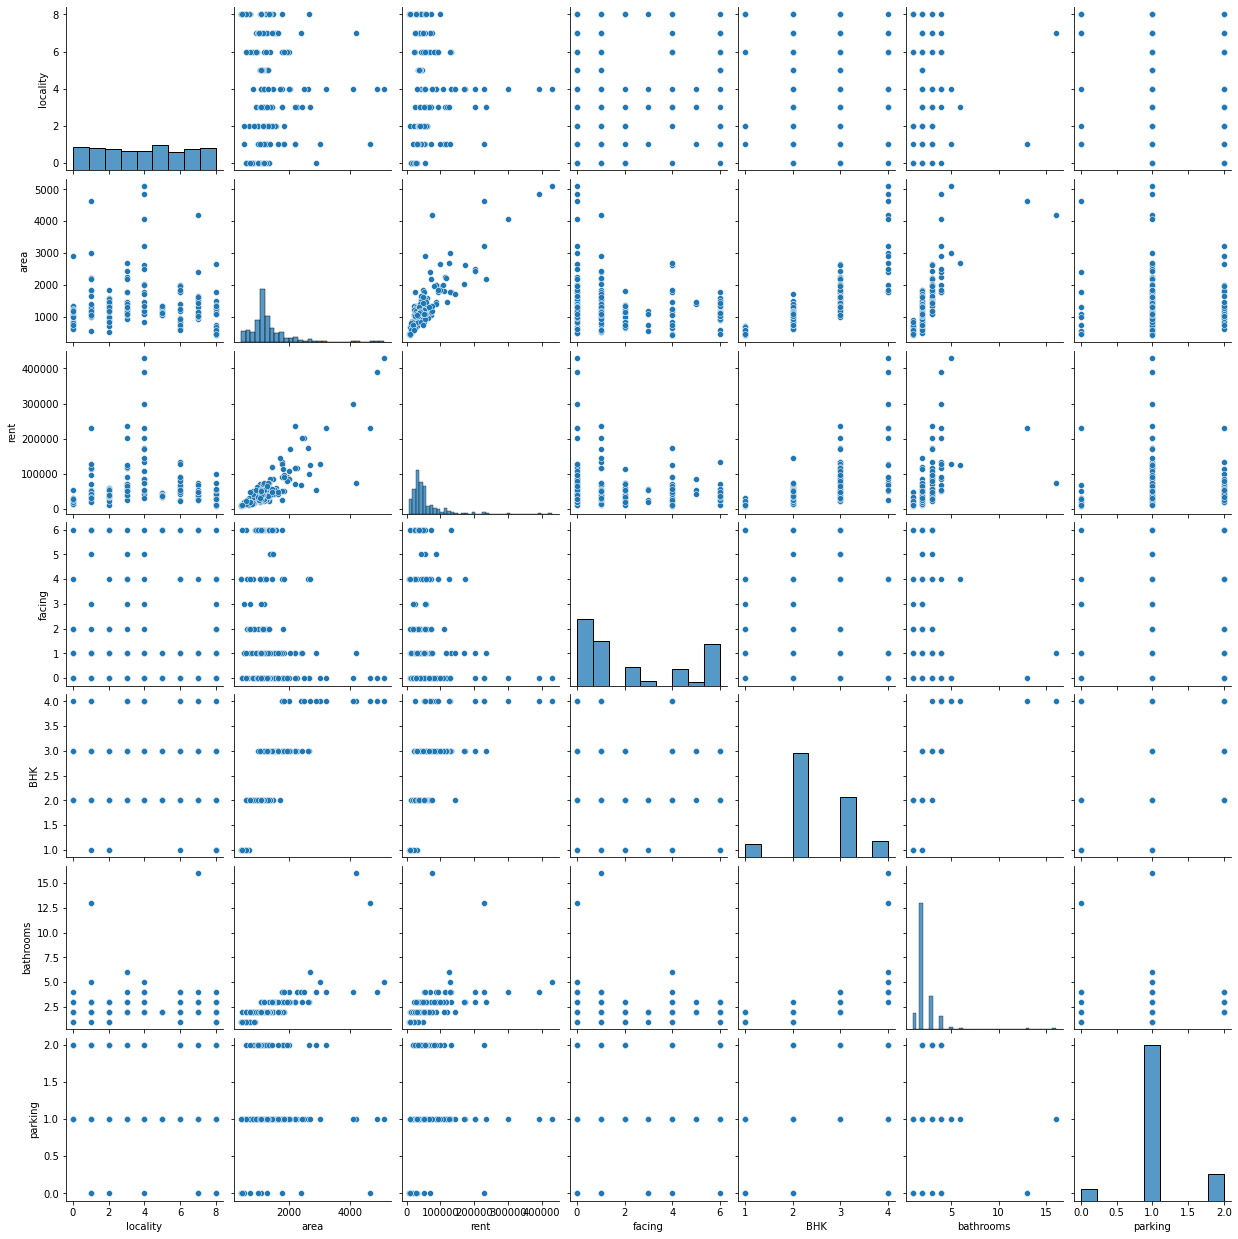

In [ ]:
import seaborn as sns
sns.pairplot(X_train)

Outlier detection based on area,rent,bhk,bathrooms

In [ ]:
#area and rent

def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

In [ ]:
X_train['mahalanobis'] = mahalanobis(x=X_train[['area','rent']], data=X_train[['area','rent']])

In [ ]:
X_train

,locality,area,rent,facing,BHK,bathrooms,parking,mahalanobis
163,8.0,750.0,25791.0,3,2.0,2.0,0,0.853514
67,5.0,1295.0,43623.0,0,3.0,2.0,1,0.108123
55,5.0,1133.0,36108.0,6,2.0,2.0,1,0.154891
124,3.0,1243.0,56741.0,4,3.0,2.0,1,0.097542
127,2.0,720.0,31522.0,2,1.0,1.0,1,1.157412
...,...,...,...,...,...,...,...,...
106,3.0,1300.0,65911.0,0,3.0,2.0,1,0.187678
14,1.0,1060.0,31522.0,1,3.0,2.0,1,0.228373
92,7.0,1640.0,48717.0,1,3.0,2.0,1,0.938095
179,6.0,1850.0,91703.0,4,4.0,4.0,1,0.392203


In [ ]:
from scipy.special import chdtri
chdtri(2,1-0.95)

5.991464547107979

In [ ]:
X_train[X_train['mahalanobis']>=5.99]

,locality,area,rent,facing,BHK,bathrooms,parking,mahalanobis
223,4.0,5100.0,430000.0,0,4.0,5.0,1,40.320680
76,7.0,4200.0,74508.0,1,4.0,16.0,1,47.827223
205,4.0,4859.0,391000.0,0,4.0,4.0,1,31.938997
100,3.0,2200.0,235000.0,1,3.0,3.0,1,16.858398
216,4.0,3223.0,229000.0,0,4.0,4.0,2,8.348538
8,1.0,3006.0,129000.0,0,4.0,5.0,1,6.541896
13,1.0,4650.0,229000.0,0,4.0,13.0,0,22.419003
217,4.0,2495.0,201000.0,0,4.0,4.0,1,7.006538
37,0.0,2900.0,54448.0,1,4.0,4.0,2,16.654435
103,3.0,2450.0,201000.0,1,3.0,3.0,1,7.276073


In [ ]:
sum(X_train['bathrooms']==16)

1

In [ ]:
X_train['y'] = y_train

In [ ]:
X_train = X_train[X_train['mahalanobis']<5.99]

In [ ]:
y_train = X_train['y']

In [ ]:
X_train = X_train.drop('y', axis = 1)

Removing outliers in test data

In [ ]:
X_test['mahalanobis'] = mahalanobis(x=X_test[['area','rent']], data=X_train[['area','rent']])

In [ ]:
X_test[X_test['mahalanobis']>=5.99]

,locality,area,rent,facing,BHK,bathrooms,parking,mahalanobis
207,4.0,2336.0,77374.0,0,4.0,4.0,1,9.071605
214,4.0,1940.0,152000.0,6,3.0,3.0,1,13.963656
182,6.0,1550.0,112000.0,0,3.0,3.0,1,6.373997
175,6.0,5200.0,344000.0,0,4.0,14.0,1,99.026769
200,4.0,1990.0,201000.0,4,3.0,3.0,1,36.322884
45,0.0,2000.0,13468.0,0,2.0,1.0,1,19.012666
176,6.0,1582.0,115000.0,4,3.0,3.0,2,6.794307
101,3.0,2750.0,163000.0,1,4.0,3.0,1,14.668442
75,7.0,7200.0,126000.0,4294967295,4.0,26.0,0,363.974381


In [ ]:
X_test['y'] = y_test
X_test = X_test[X_test['mahalanobis']<5.99]
y_test = X_test['y']
X_test = X_test.drop('y', axis = 1)

In [ ]:
X_test[X_test['mahalanobis']>=5.99]

,locality,area,rent,facing,BHK,bathrooms,parking,mahalanobis


#**Cat2Vec**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras import models
import tensorflow as tf

In [ ]:
(X_train.bathrooms.unique())

array([2., 1., 3., 4., 6.])

In [ ]:
def embedding(column_name):
  embedding_size = 3
  model = models.Sequential()
  model.add(Embedding(input_dim = 20, output_dim = embedding_size, input_length = 1, name="embedding"))
  model.add(tf.keras.layers.Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(1))
  model.compile(loss = "mse", optimizer = "adam", metrics=["accuracy"])
  model.fit(x = X_train[column_name].to_numpy(), y=y_train.to_numpy() , epochs = 500, batch_size = 4, verbose = 0)
  return model.weights[0].numpy()

In [ ]:
def create_columns_train(weights1,col_name):
  conditions = [(X_train[col_name] == i) for i in X_train.bathrooms.unique()]
  # conditions = [
  #               (df['bathrooms'] == 2),
  #               (df['bathrooms'] == 1),
  #               (df['bathrooms'] == 3),
  #               (df['bathrooms'] == 4),
  #               (df['bathrooms'] == 6),
  # ]
  # create a list of the values we want to assign for each condition
  values0 = [weights1[int(i)][0] for i in X_train.bathrooms.unique()]
  values1 = [weights1[int(i)][1] for i in X_train.bathrooms.unique()]
  values2 = [weights1[int(i)][2] for i in X_train.bathrooms.unique()]

  # create a new column and use np.select to assign values to it using our lists as arguments
  X_train['{}_0'.format(col_name)] = np.select(conditions, values0)
  X_train['{}_1'.format(col_name)] = np.select(conditions, values1)
  X_train['{}_2'.format(col_name)] = np.select(conditions, values2)




In [ ]:
def create_columns_test(weights1,col_name):
  conditions = [(X_test[col_name] == i) for i in X_train.bathrooms.unique()]
  # conditions = [
  #               (df['bathrooms'] == 2),
  #               (df['bathrooms'] == 1),
  #               (df['bathrooms'] == 3),
  #               (df['bathrooms'] == 4),
  #               (df['bathrooms'] == 6),
  # ]
  # create a list of the values we want to assign for each condition
  values0 = [weights1[int(i)][0] for i in X_train.bathrooms.unique()]
  values1 = [weights1[int(i)][1] for i in X_train.bathrooms.unique()]
  values2 = [weights1[int(i)][2] for i in X_train.bathrooms.unique()]

  # create a new column and use np.select to assign values to it using our lists as arguments
  X_test['{}_0'.format(col_name)] = np.select(conditions, values0)
  X_test['{}_1'.format(col_name)] = np.select(conditions, values1)
  X_test['{}_2'.format(col_name)] = np.select(conditions, values2)




In [ ]:
weights = embedding('bathrooms')
create_columns_train(weights,'bathrooms')
create_columns_test(weights,'bathrooms')

**Cat2vec for BHK,facing and parking**

In [ ]:
weights = embedding('BHK')
create_columns_train(weights,'BHK')
create_columns_test(weights,'BHK')

In [ ]:
weights = embedding('facing')
create_columns_train(weights,'facing')
create_columns_test(weights,'facing')

In [ ]:
weights = embedding('parking')
create_columns_train(weights,'parking')
create_columns_test(weights,'parking')

In [ ]:
X_train.head()

,locality,area,rent,facing,BHK,bathrooms,parking,mahalanobis,bathrooms_0,bathrooms_1,bathrooms_2,BHK_0,BHK_1,BHK_2,facing_0,facing_1,facing_2,parking_0,parking_1,parking_2
163,8.0,750.0,25791.0,3,2.0,2.0,0,0.853514,0.668584,0.672300,0.694555,-0.668360,-0.794370,-0.784858,0.771213,0.864951,-0.797662,0.000000,0.000000,0.000000
67,5.0,1295.0,43623.0,0,3.0,2.0,1,0.108123,0.668584,0.672300,0.694555,-0.958665,-0.915730,-0.882017,0.000000,0.000000,0.000000,0.894745,0.871229,-0.843217
55,5.0,1133.0,36108.0,6,2.0,2.0,1,0.154891,0.668584,0.672300,0.694555,-0.668360,-0.794370,-0.784858,0.568287,0.659482,-0.581643,0.894745,0.871229,-0.843217
124,3.0,1243.0,56741.0,4,3.0,2.0,1,0.097542,0.668584,0.672300,0.694555,-0.958665,-0.915730,-0.882017,0.836582,0.905968,-0.874249,0.894745,0.871229,-0.843217
127,2.0,720.0,31522.0,2,1.0,1.0,1,1.157412,0.457713,0.432418,0.469235,-0.483312,-0.399851,-0.448148,0.671701,0.697158,-0.731568,0.894745,0.871229,-0.843217


In [ ]:
X_test.head()

,locality,area,rent,facing,BHK,bathrooms,parking,mahalanobis,bathrooms_0,bathrooms_1,bathrooms_2,BHK_0,BHK_1,BHK_2,facing_0,facing_1,facing_2,parking_0,parking_1,parking_2
9,1.0,1600.0,92849.0,4,3.0,2.0,1,2.320588,0.668584,0.6723,0.694555,-0.958665,-0.91573,-0.882017,0.836582,0.905968,-0.874249,0.894745,0.871229,-0.843217
184,6.0,1150.0,85971.0,6,3.0,2.0,1,5.024349,0.668584,0.6723,0.694555,-0.958665,-0.91573,-0.882017,0.568287,0.659482,-0.581643,0.894745,0.871229,-0.843217
120,3.0,1331.0,48717.0,0,3.0,2.0,1,0.090574,0.668584,0.6723,0.694555,-0.958665,-0.91573,-0.882017,0.000000,0.000000,0.000000,0.894745,0.871229,-0.843217
148,2.0,1108.0,39546.0,0,2.0,2.0,1,0.106670,0.668584,0.6723,0.694555,-0.668360,-0.79437,-0.784858,0.000000,0.000000,0.000000,0.894745,0.871229,-0.843217
86,7.0,1302.0,48717.0,0,2.0,2.0,1,0.037472,0.668584,0.6723,0.694555,-0.668360,-0.79437,-0.784858,0.000000,0.000000,0.000000,0.894745,0.871229,-0.843217


In [ ]:
weights

array([[ 0.50757986,  0.51664776, -0.566823  ],
       [ 0.8947448 ,  0.8712289 , -0.8432173 ],
       [ 0.9176768 ,  0.9623976 , -1.0208321 ],
       [ 0.01862646, -0.0148605 ,  0.00588814],
       [ 0.02657672,  0.03245789, -0.04963328],
       [-0.00375228,  0.03762669,  0.03412206],
       [ 0.02137525,  0.01484141,  0.00933043],
       [-0.01943463,  0.00263868, -0.00930673],
       [-0.04037802, -0.03741678,  0.01968912],
       [-0.04735661,  0.01162821,  0.03966444],
       [ 0.03285028,  0.0148886 ,  0.01133474],
       [ 0.01470567,  0.0232426 , -0.02705431],
       [ 0.04178882,  0.02135784, -0.02788706],
       [ 0.04538519, -0.03979957, -0.0148664 ],
       [ 0.03570911,  0.02266855,  0.02334764],
       [-0.01124341,  0.00126754,  0.04583509],
       [-0.03687184,  0.03697956,  0.04059419],
       [-0.01267242,  0.02629394,  0.0476895 ],
       [ 0.02591263,  0.00585628,  0.00319771],
       [-0.04970952, -0.02914177, -0.02618808]], dtype=float32)

In [ ]:
#now we drop BHK,facing,Bathroom,parking,mahalanobis
X_train.drop(['BHK','facing','bathrooms','parking'], axis = 1, inplace = True)
X_test.drop(['BHK','facing','bathrooms','parking'], axis = 1, inplace = True)

In [ ]:
X_train.drop(['mahalanobis'], axis = 1, inplace = True)
X_test.drop(['mahalanobis'], axis = 1, inplace = True)

#**PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train1 = std.transform(X_train)
X_test1 = std.transform(X_test)

In [ ]:
X_train.shape

(169, 15)

#**Prediction**

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
pred = reg.predict(X_test)
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,pred)))
print('r2_score : {}'.format(r2_score(y_test,pred)))

Mean Squared Error : 373180.92149115325
r2_score : 0.9364836622308348


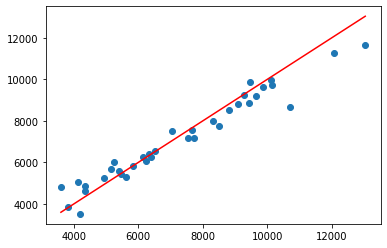

In [ ]:
plt.scatter(y_test,pred)
x = np.arange(min(y_test),max(y_test))
plt.plot(x,x, color = 'red')